In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## 1) 載入資料集

In [3]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 2) EDA (Exploratory Data Analysis) 探索式資料分析
主要概念是透過數據統計的方式視覺化資料。做EDA的好處可以從各種面向先了解資料的狀況，以利後續的模型分析。

## 直方圖

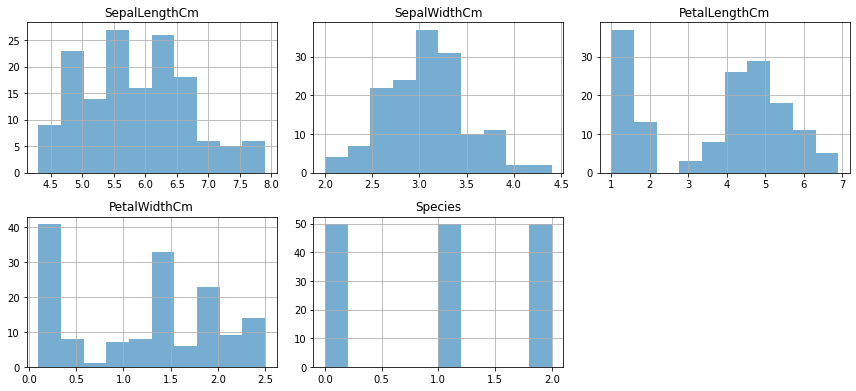

In [4]:
#直方圖 histograms
df_data.hist(alpha=0.6,layout=(3,3), figsize=(12, 8), bins=10) 
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

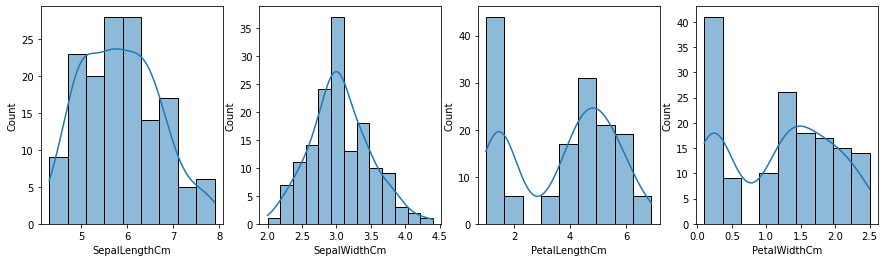

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
# 透過sns的histplot，則可以看到其直方圖，將kde設為True後，還可以看到其核密度估計情形
sns.histplot(df_data["SepalLengthCm"][:],ax=axes[0], kde=True)
sns.histplot(df_data["SepalWidthCm"][:],ax=axes[1], kde=True)
sns.histplot(df_data["PetalLengthCm"][:],ax=axes[2], kde=True)
sns.histplot(df_data["PetalWidthCm"][:],ax=axes[3], kde=True)

## 核密度估計Kernel Density Estimation(KDE)

array([[<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='Species', yl

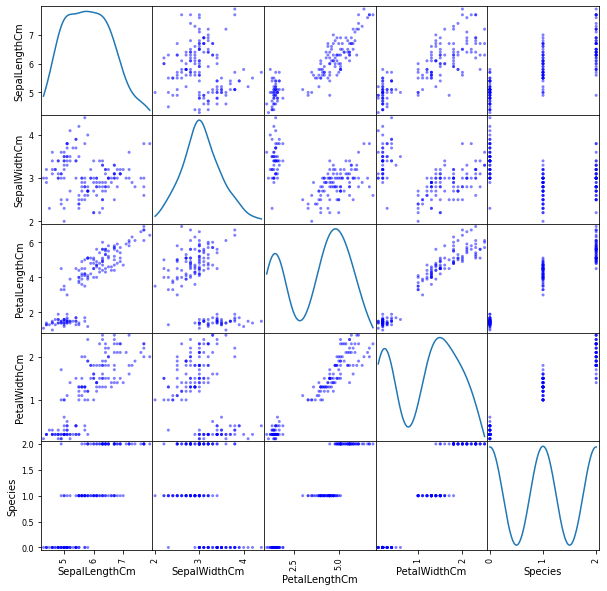

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix( df_data,figsize=(10, 10),color='b',diagonal='kde')

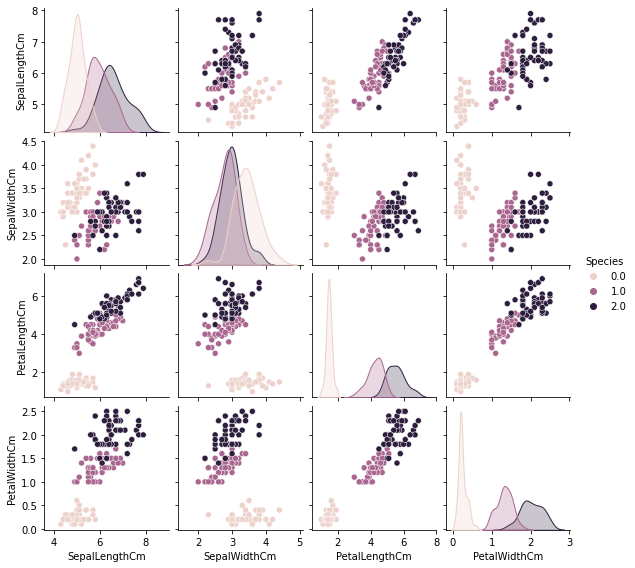

In [7]:
sns.pairplot(df_data, hue="Species", height=2, diag_kind="kde")

## 關聯分析 (correlation map)

In [8]:
df_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


<AxesSubplot:>

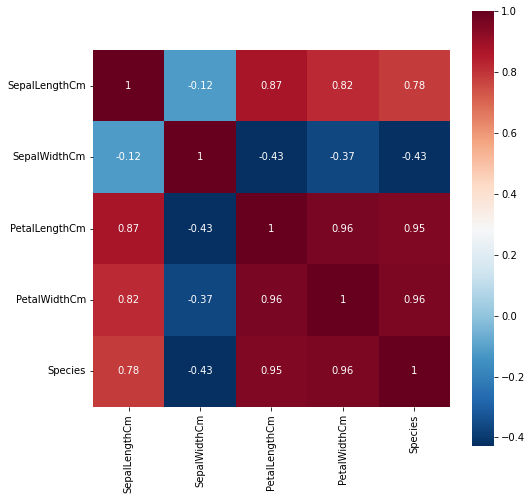

In [9]:
# correlation calculate
corr = df_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"

<AxesSubplot:>

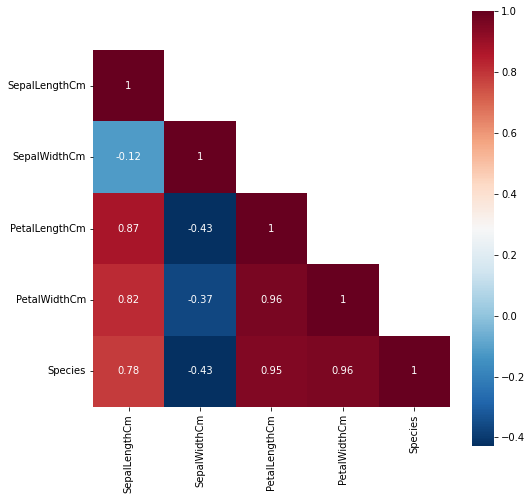

In [21]:
# correlation calculate
corr = df_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']].corr()
# 將矩陣型簡化為對角矩陣型
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)

plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, mask=mask, cmap="RdBu_r") #center=0, cmap="YlGnBu"

## 散佈圖

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


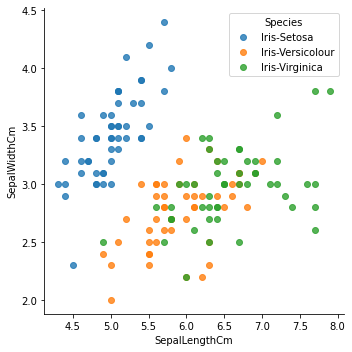

In [11]:
sns.lmplot("SepalLengthCm", "SepalWidthCm", hue='Species', data=df_data, fit_reg=False, legend=False)
plt.legend(title='Species', loc='upper right', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


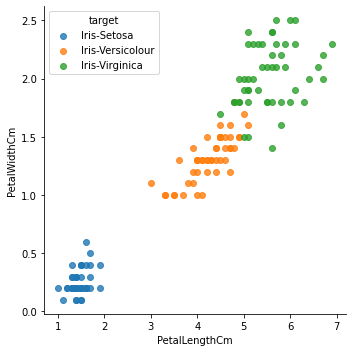

In [12]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Species', data=df_data, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

## 箱形圖
透過箱形圖可以分析每個特徵的分布狀況以及是否有離群值

Text(0.5, 1.0, 'Species')

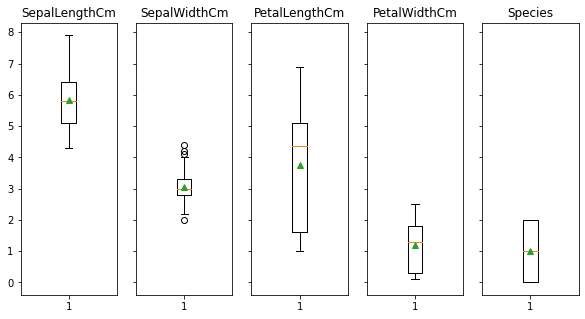

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,5), sharey=True)
axes[0].boxplot(df_data['SepalLengthCm'],showmeans=True)
axes[0].set_title('SepalLengthCm')

axes[1].boxplot(df_data['SepalWidthCm'],showmeans=True)
axes[1].set_title('SepalWidthCm')

axes[2].boxplot(df_data['PetalLengthCm'],showmeans=True)
axes[2].set_title('PetalLengthCm')

axes[3].boxplot(df_data['PetalWidthCm'],showmeans=True)
axes[3].set_title('PetalWidthCm')

axes[4].boxplot(df_data['Species'],showmeans=True)
axes[4].set_title('Species')


